In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
data = pd.read_csv ('inputs\Billionaire.csv')
data.head (5)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


Pre-Processing

In [5]:
data = data.dropna().reset_index()

data.isnull().sum()

index       0
Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [6]:
data ['NetWorth'] = data ['NetWorth'].str.strip ('$')
data ['NetWorth'] = data ['NetWorth'].str.strip ('B')
data ['NetWorth'] = data ['NetWorth'].astype (float)

data.head (5)

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


Age Mean and Variance

In [7]:
age = np.array (data ['Age'])

mean = np.mean (age)
print ('Mean of billionaires age = ' , mean)

var = np.var (age)
print ('Variance of billionaires age = ' , var)

Mean of billionaires age =  63.1136023916293
Variance of billionaires age =  180.70458328585374


Sum of each countries Worth

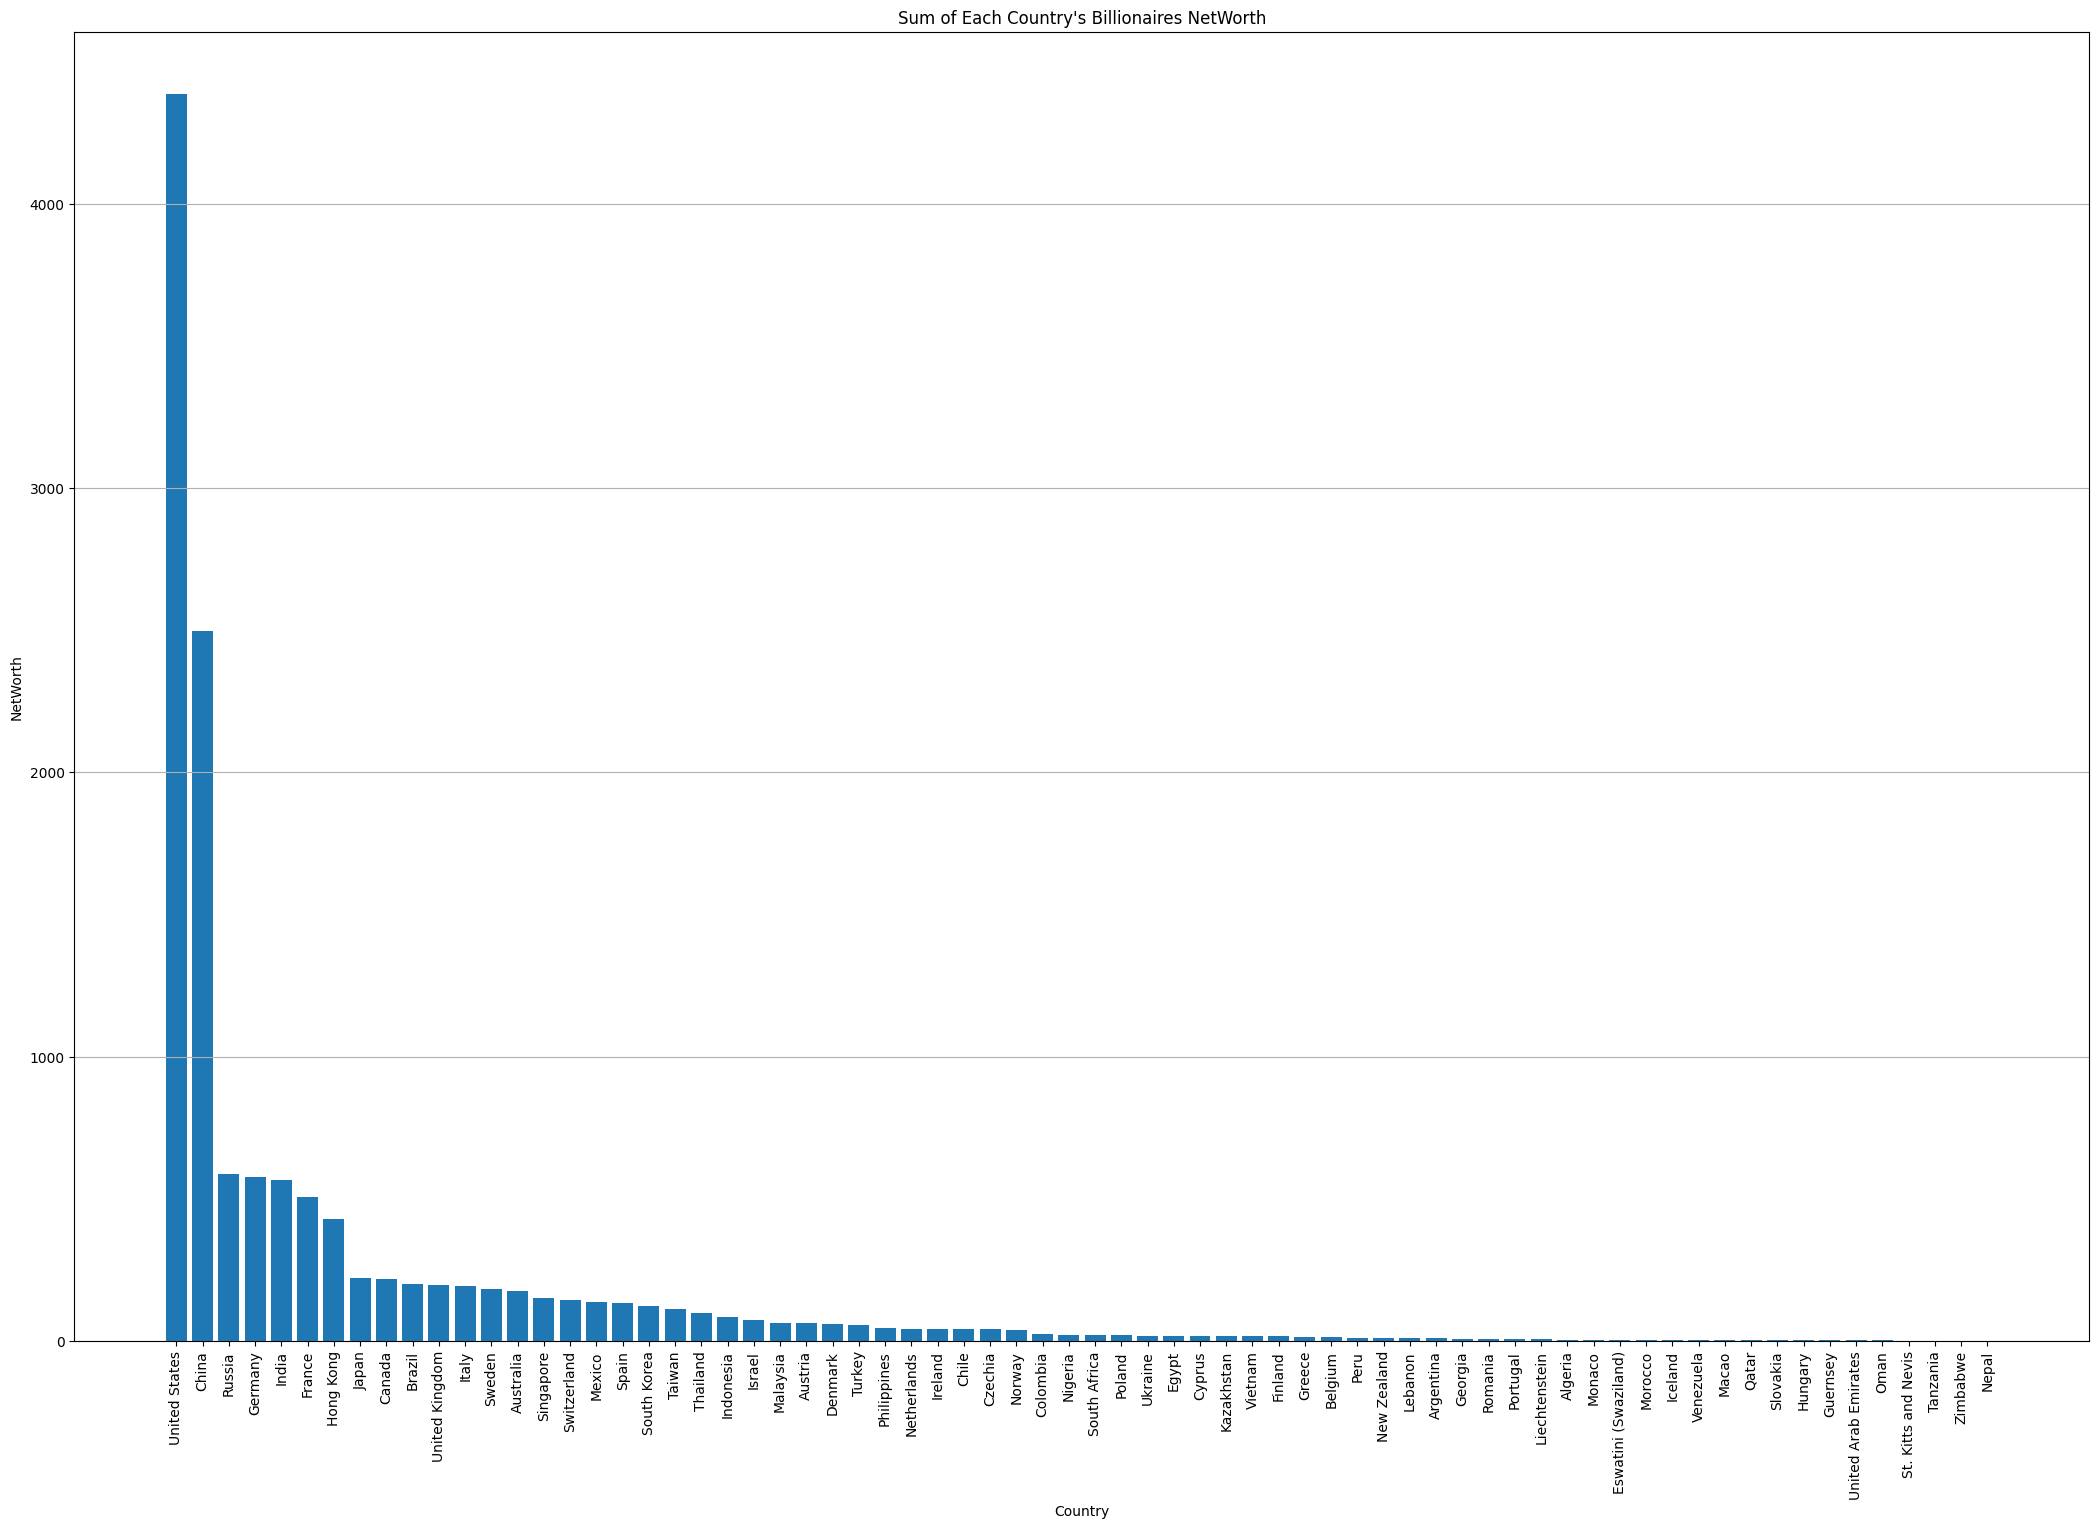

In [8]:
df_country = data.groupby (['Country'])['NetWorth'].sum().reset_index ().sort_values (by = ['NetWorth'] , ascending = False)
df_country

plt.figure (figsize = (26 , 17))
plt.bar (df_country['Country'] , df_country['NetWorth'])

plt.xticks (rotation = 'vertical')
plt.xlabel ('Country')
plt.ylabel ('NetWorth')
plt.title ("Sum of Each Country's Billionaires NetWorth")
plt.grid (axis= 'y')

plt.savefig ('outputs\output1 networth sum.png')
plt.show ()

America's top 10 Billionaires base on their networth

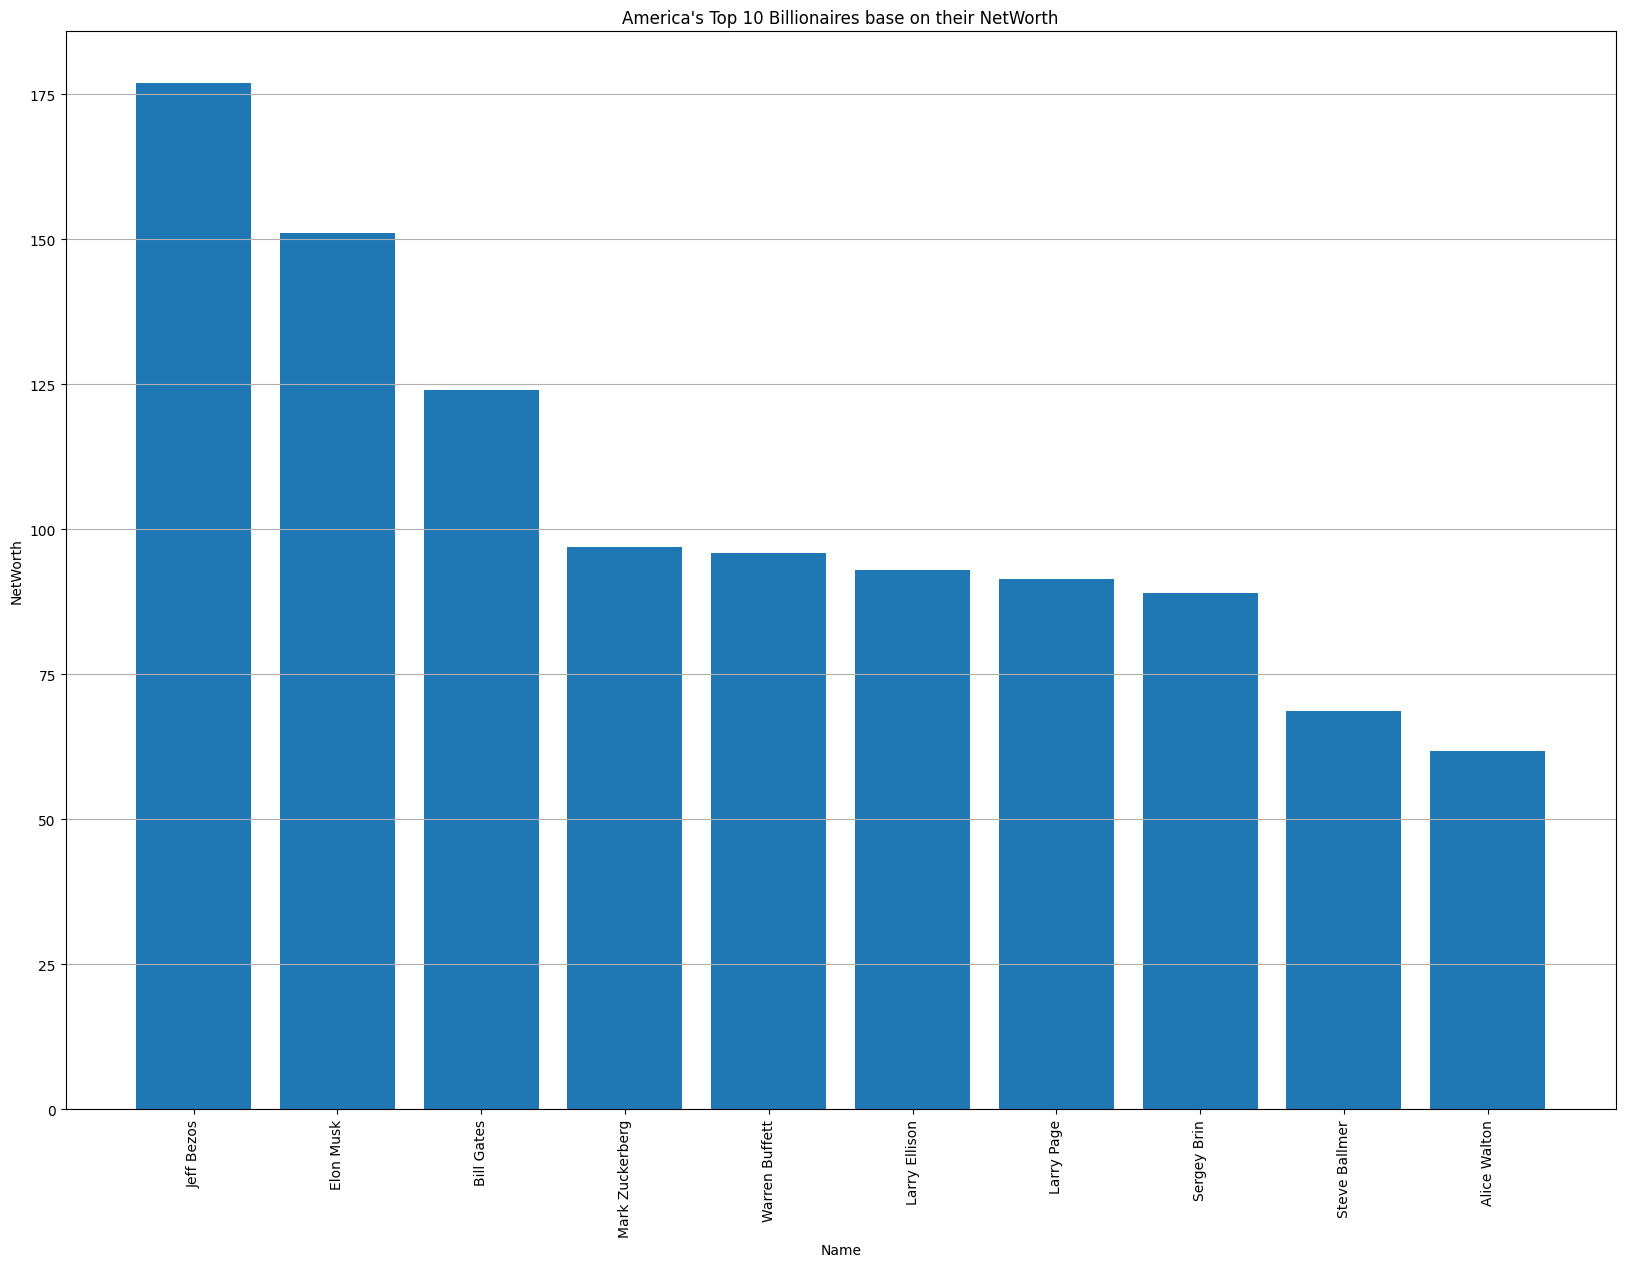

In [9]:
df_usa = data.query ('Country == "United States"')
df_usa = df_usa.sort_values (by = ['NetWorth'] , ascending = False).head (10).reset_index (drop = True)

plt.figure (figsize = (20 , 14))
plt.bar (df_usa['Name'] , df_usa['NetWorth'])

plt.xticks (rotation = 'vertical')
plt.xlabel ('Name')
plt.ylabel ('NetWorth')
plt.title ("America's Top 10 Billionaires base on their NetWorth")
plt.grid (axis= 'y')

plt.savefig ('outputs\output1 USA top 10.png')
plt.show ()

Countries with less number of Billionaires

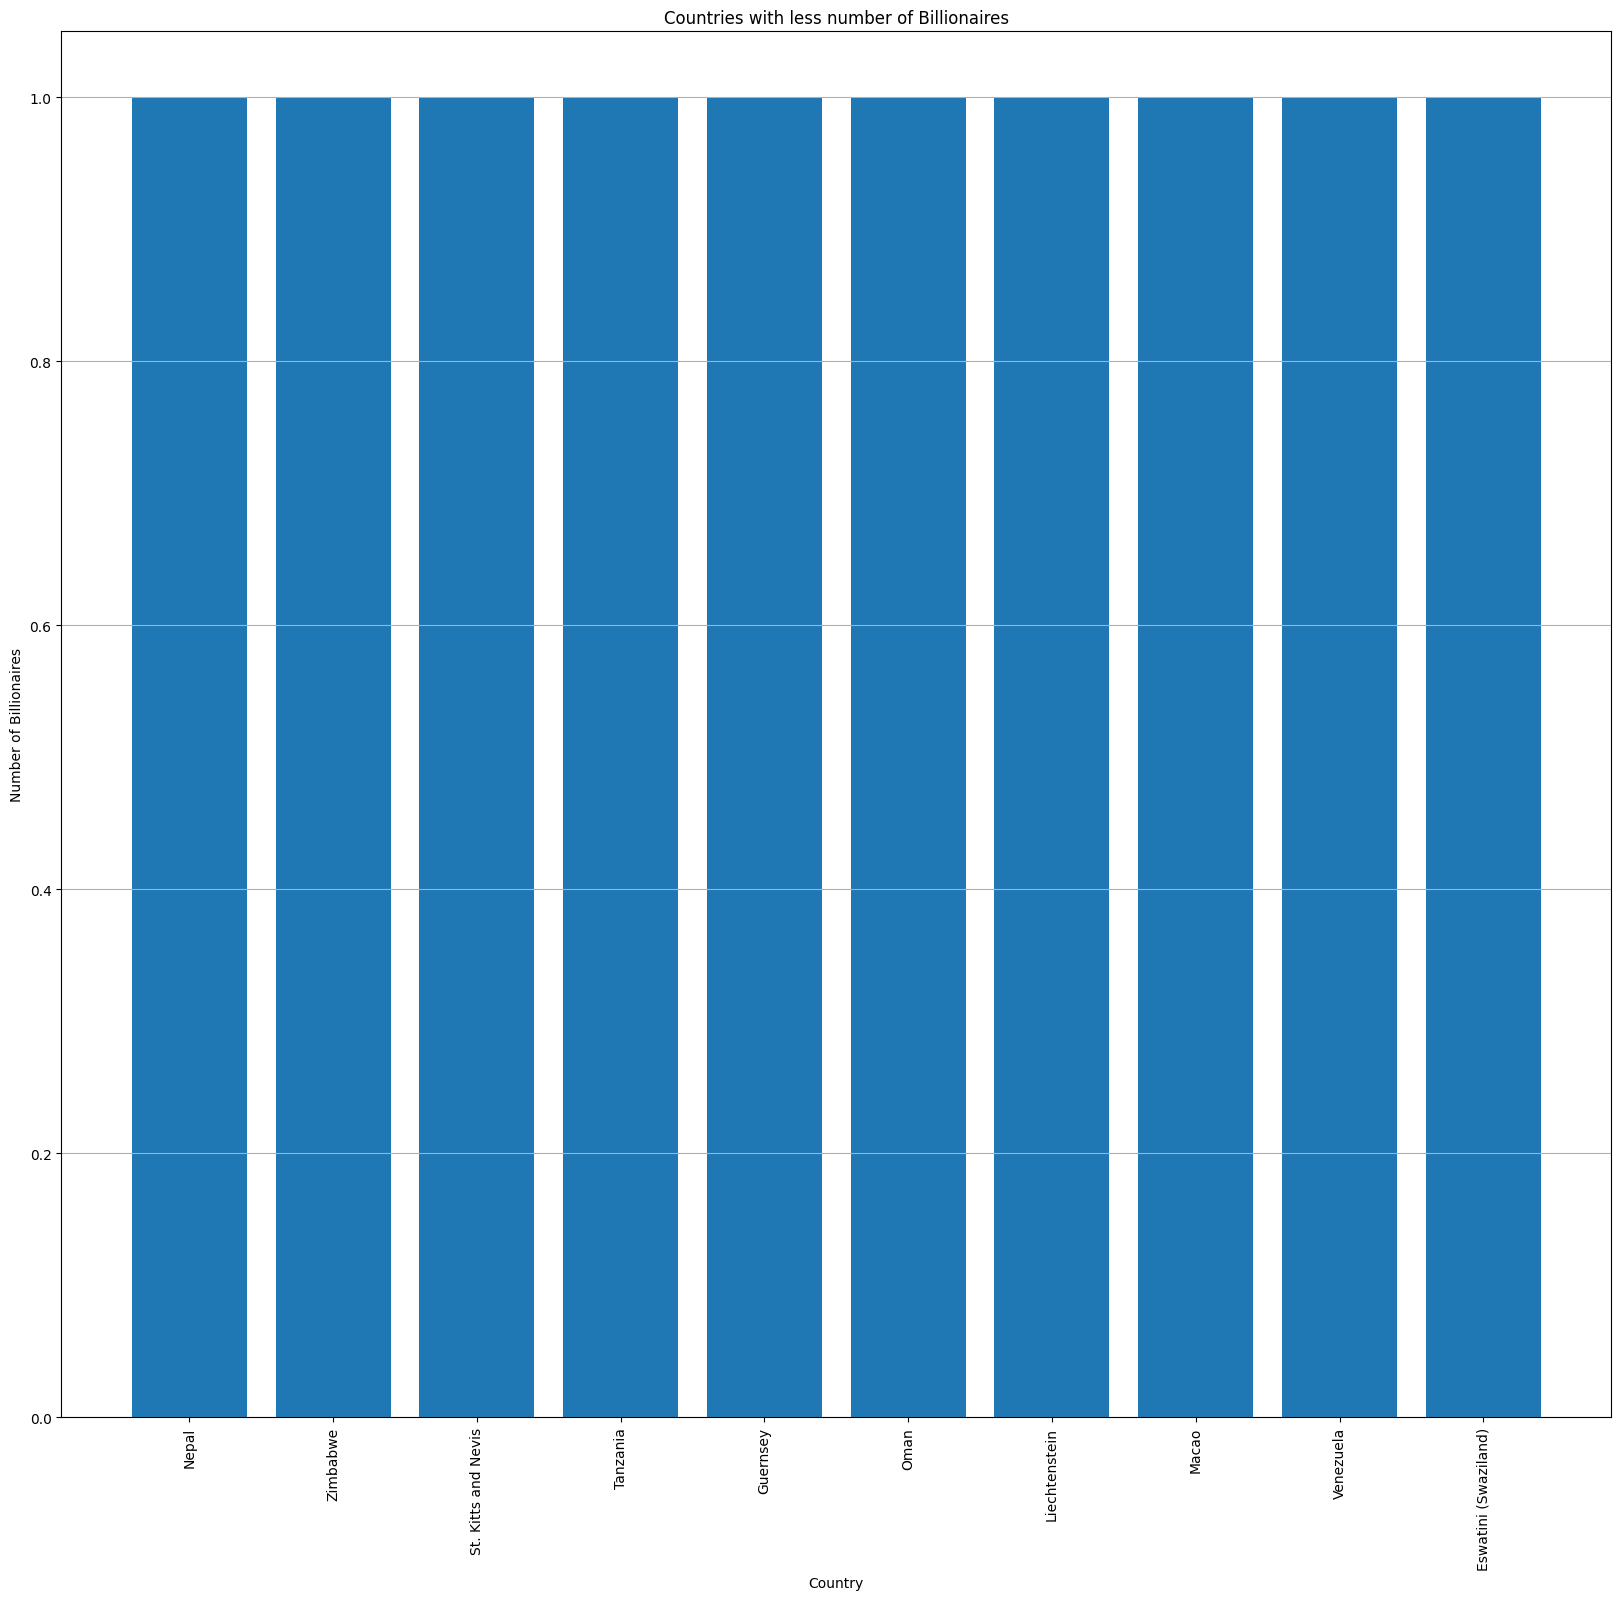

In [11]:
df_number = data['Country'].value_counts().reset_index ()
df_poor = df_number.sort_values (by = ['count'] , ascending = True).head(10)

plt.figure (figsize = (20 , 18))
plt.bar (df_poor['Country'] , df_poor['count'] )

plt.xticks (rotation = 'vertical')
plt.xlabel ('Country')
plt.ylabel ('Number of Billionaires')
plt.title ("Countries with less number of Billionaires")
plt.grid (axis= 'y')

plt.savefig ('outputs\output1 country with less number of billionaires.png')
plt.show ()